In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import json

In [2]:
df_10 = pd.read_csv("parsed_GMn_11495_0_0.txt", sep=" ", header=1)

In [3]:
df_11 = pd.read_csv("parsed_GMn_11495_5_5.txt", sep=" ", header=1)

In [4]:
df_12 = pd.read_csv("parsed_GMn_11495_6_6.txt", sep=" ", header=1)

In [5]:
df_13 = pd.read_csv("parsed_GMn_11495_7_7.txt", sep=" ", header=1)

In [6]:
df_14 = pd.read_csv("parsed_GMn_11495_8_8.txt", sep=" ", header=1)

In [7]:
df_15 = pd.read_csv("parsed_GMn_11495_9_9.txt", sep=" ", header=1)

In [8]:
df_16 = pd.read_csv("parsed_GMn_11495_10_10.txt", sep=" ", header=1)

In [9]:
df_17 = pd.read_csv("parsed_GMn_11495_11_11.txt", sep=" ", header=1)

In [10]:
column_names=["nevent","Number of Tracks Found","Number of good hits on all tracks","Hits on track 1","Hits on track 2","Hits on track 3","Track index","GEM Layer","Global X","Global Y","Global Z",
              "Global X_Layer0","Global Y_Layer0","Layer0_On Track?",
              "Global X_Layer1","Global Y_Layer1","Layer1_On Track?",
              "Global X_Layer2","Global Y_Layer2","Layer2_On Track?",
              "Global X_Layer3","Global Y_Layer3","Layer3_On Track?",
              "Global X_Layer4","Global Y_Layer4","Layer4_On Track?"]

df_10.columns = column_names
df_11.columns = column_names
df_12.columns = column_names
df_13.columns = column_names
df_14.columns = column_names
df_15.columns = column_names
df_16.columns = column_names
df_17.columns = column_names

In [11]:
dataframes = [df_10, df_11, df_12, df_13, df_14, df_15, df_16, df_17]

adjustment = 0
result_dfs = []

for df_temp in dataframes:
    df_copy = df_temp.copy()
    df_copy['nevent'] += adjustment
    result_dfs.append(df_copy)

    adjustment = df_copy['nevent'].iloc[-1] + 1

df = pd.concat(result_dfs, axis=0, ignore_index=True)

In [12]:
df_filtered = df

In [2]:
import torch
import torch_geometric
from torch_geometric.data import Data
from scipy.spatial.distance import cdist

In [27]:
data_list = []

nevent = []
dataset = []
y = []
edges = []
dataset_2D = []
hit_layer = []
dist_test = []

'''
for event in range(df_filtered['nevent'].nunique()):
    if (df_filtered['nevent'].isin([event]).any()):
        df_portion = df_filtered[df_filtered['nevent']==event]
'''


k = 0

for i in range(len(df_filtered['nevent'].unique())):
  if k == 60000:
    break
  else:

    
    
    event = df_filtered['nevent'].unique()[i]

    if (df_filtered['nevent'].isin([event]).any()):
        df_portion = df_filtered[df_filtered['nevent']==event]
   
        hit_sequence = df_portion['GEM Layer'].iloc[0:4].tolist()

        if hit_sequence == [0, 1, 2, 3]:
           
            layer = []
            layer_X = []
            layer_Y = []
            layer_Z = []
            target = []
            coordinates = [[], [], []]
            edge_index = []
            coordinates_2D = [[], []]


            r_values = []
            theta_values = []


            #if 0 in df_portion['GEM Layer'].values:
            nevent += [event] * ((df_portion['Global X_Layer0'] != 0).sum())
            layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]['Global X_Layer0'].values.tolist())
            layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]['Global Y_Layer0'].values.tolist())
            layer_Z += [df_portion['Global Z'].iloc[0]] * ((df_portion['Global X_Layer0'] != 0).sum())
            layer += [0] * ((df_portion['Global X_Layer0'] != 0).sum())
            target.extend(df_portion.iloc[0:(df_portion['Global X_Layer0'] != 0).sum()]["Layer0_On Track?"].values.tolist())

    #if 1 in df_portion['GEM Layer'].values:
            nevent += [event] * ((df_portion['Global X_Layer1'] != 0).sum())
            layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]['Global X_Layer1'].values.tolist())
            layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]['Global Y_Layer1'].values.tolist())
            layer_Z += [df_portion['Global Z'].iloc[1]] * ((df_portion['Global X_Layer1'] != 0).sum())
            layer += [1] * ((df_portion['Global X_Layer1'] != 0).sum())
            target.extend(df_portion.iloc[0:(df_portion['Global X_Layer1'] != 0).sum()]["Layer1_On Track?"].values.tolist())


    #if 2 in df_portion['GEM Layer'].values:
            nevent += [event] * ((df_portion['Global X_Layer2'] != 0).sum())
            layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]['Global X_Layer2'].values.tolist())
            layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]['Global Y_Layer2'].values.tolist())
            layer_Z += [df_portion['Global Z'].iloc[2]] * ((df_portion['Global X_Layer2'] != 0).sum())
            layer += [2] * ((df_portion['Global X_Layer2'] != 0).sum())
            target.extend(df_portion.iloc[0:(df_portion['Global X_Layer2'] != 0).sum()]["Layer2_On Track?"].values.tolist())


    #if 3 in df_portion['GEM Layer'].values:
            nevent += [event] * ((df_portion['Global X_Layer3'] != 0).sum())
            layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]['Global X_Layer3'].values.tolist())
            layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]['Global Y_Layer3'].values.tolist())
            layer_Z += [df_portion['Global Z'].iloc[3]] * ((df_portion['Global X_Layer3'] != 0).sum())
            layer += [3] * ((df_portion['Global X_Layer3'] != 0).sum())
            target.extend(df_portion.iloc[0:(df_portion['Global X_Layer3'] != 0).sum()]["Layer3_On Track?"].values.tolist())

            '''

    #if 4 in df_portion['GEM Layer'].values:
            nevent += [event] * ((df_portion['Global X_Layer4'] != 0).sum())
            layer_X.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]['Global X_Layer4'].values.tolist())
            layer_Y.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]['Global Y_Layer4'].values.tolist())
            layer_Z += [5] * ((df_portion['Global X_Layer4'] != 0).sum())
            layer += [4] * ((df_portion['Global X_Layer4'] != 0).sum())
            target.extend(df_portion.iloc[0:(df_portion['Global X_Layer4'] != 0).sum()]["Layer4_On Track?"].values.tolist())
            '''

            #coordinates[0].append(layer_X)
            #coordinates[1].append(layer_Y)
            #coordinates[2].append(layer_Z)

            #column1 = np.array(coordinates)[0, 0]
            #column2 = np.array(coordinates)[1, 0]
            #column3 = np.array(coordinates)[2, 0]
            #coordinates_array = np.column_stack((column1, column2, column3))
            coordinates_2D = np.array(np.column_stack((layer_X, layer_Y)), dtype=np.float32)
            coordinates_3D = np.array(np.column_stack((layer_X, layer_Y, layer_Z)), dtype=np.float32)


            z_coordinates = layer_Z#coordinates_array[:, 2]

            #distances = 1 / (cdist(z_coordinates.reshape(-1, 1), z_coordinates.reshape(-1, 1)) + 0.1)

            ## distances_z = (cdist(z_coordinates.reshape(-1, 1), z_coordinates.reshape(-1, 1)) + 0.1)
            #distances_z = (cdist(np.array(z_coordinates).reshape(-1, 1), np.array(z_coordinates).reshape(-1, 1)) + 0.1)
            distances_z = (cdist(np.array(z_coordinates).reshape(-1, 1), np.array(z_coordinates).reshape(-1, 1)))
            distances_2D = (cdist(coordinates_2D, coordinates_2D))


            dist_test.append(distances_2D)

            #distance_threshold_z = 1.2
            distance_threshold_z = 0.2
            distance_threshold_2D = 0.03

            edge_index = []
            for i in range(len(layer_Z)):
                for j in range(i + 1, len(layer_Z)):
                    if distances_z[i, j] < distance_threshold_z:
                      if distances_2D[i, j] < distance_threshold_2D:
                        edge_index.append([i, j])
                        edge_index.append([j, i])
            edge_index = np.array(edge_index).T



    #### ########### ########### ########### ########### ########### ########### ########### ###########
    #### FILTER FOR REACH OF THE LINKS(Set to consider events that has hits on layers - 0,1,2,3,4) ######
    #### ########### ########### ########### ########### ########### ########### ########### ###########
            #indices = [i for i, value in enumerate(target) if value == 1]

            # Get the corresponding values in the 'layer' array
            #corresponding_layer_values = [layer[i] for i in indices]



    #### ########### ########### ########### ########### ########### ########### ########### ###########
    #### r, theta ######
    #### ########### ########### ########### ########### ########### ########### ########### ###########

            #num_coordinates = coordinates_2D.shape[0]

            # Initialize an empty 2D array for polar coordinates with the same shape
            '''
            polar_coordinates = np.zeros((num_coordinates, 2))

            # Convert to polar coordinates and store in the 2D array
            for i in range(num_coordinates):
                x, y = coordinates_2D[i]
                polar_coordinates[i, 0] = np.sqrt(x**2 + y**2)  # r
                polar_coordinates[i, 1] = np.arctan2(y, x)     # θ

            # The polar_coordinates array will contain the radial distances (r) and angles (θ) for each input coordinate.

            # Example of converting radians to degrees
            polar_coordinates_degrees = np.copy(polar_coordinates)
            polar_coordinates_degrees[:, 1] = np.degrees(polar_coordinates[:, 1])
            '''

    #### ########### ########### ########### ########### ########### ########### ########### ###########
    #### r, theta ######
    #### ########### ########### ########### ########### ########### ########### ########### ###########



            event_data = {
                'event': df_portion['nevent'].iloc[0],
                #'coordinates': coordinates,
                'coordinates_2D': coordinates_2D,#polar_coordinates,
                'coordinates_3D': coordinates_3D,
                'target': target,
                'edge_index': edge_index,
                'layer': layer
            }

            #if (corresponding_layer_values == [0, 1, 2, 3]):
            data_list.append(event_data)
            '''
            if (corresponding_layer_values == [0, 1, 2, 3, 4]):
              data_list.append(event_data)
            '''

            k = len(data_list)
            
            if len(data_list)%50 == 0:
              print(len(data_list))
              print(corresponding_layer_values)
              print()

50
[0, 1, 2, 3]

100
[0, 1, 2, 3]

150
[0, 1, 2, 3]

200
[0, 1, 2, 3]

250
[0, 1, 2, 3]

300
[0, 1, 2, 3]

350
[0, 1, 2, 3]

400
[0, 1, 2, 3]

450
[0, 1, 2, 3]

500
[0, 1, 2, 3]

550
[0, 1, 2, 3]

600
[0, 1, 2, 3]

650
[0, 1, 2, 3]

700
[0, 1, 2, 3]

750
[0, 1, 2, 3]

800
[0, 1, 2, 3]

850
[0, 1, 2, 3]

900
[0, 1, 2, 3]

950
[0, 1, 2, 3]

1000
[0, 1, 2, 3]

1050
[0, 1, 2, 3]

1100
[0, 1, 2, 3]

1150
[0, 1, 2, 3]

1200
[0, 1, 2, 3]

1250
[0, 1, 2, 3]

1300
[0, 1, 2, 3]

1350
[0, 1, 2, 3]

1400
[0, 1, 2, 3]

1450
[0, 1, 2, 3]

1500
[0, 1, 2, 3]

1550
[0, 1, 2, 3]

1600
[0, 1, 2, 3]

1650
[0, 1, 2, 3]

1700
[0, 1, 2, 3]

1750
[0, 1, 2, 3]

1800
[0, 1, 2, 3]

1850
[0, 1, 2, 3]

1900
[0, 1, 2, 3]

1950
[0, 1, 2, 3]

2000
[0, 1, 2, 3]

2050
[0, 1, 2, 3]

2100
[0, 1, 2, 3]

2150
[0, 1, 2, 3]

2200
[0, 1, 2, 3]

2250
[0, 1, 2, 3]

2300
[0, 1, 2, 3]

2350
[0, 1, 2, 3]

2400
[0, 1, 2, 3]

2450
[0, 1, 2, 3]

2500
[0, 1, 2, 3]

2550
[0, 1, 2, 3]

2600
[0, 1, 2, 3]

2650
[0, 1, 2, 3]

2700
[0, 1, 2

In [2]:
import json

In [29]:
file_path = 'data.json'

formatted_data = []

for item in data_list:
    formatted_item = {
        'event': item['event'].tolist(),
        'coordinates_2D': item['coordinates_2D'].tolist(),
        'coordinates_3D': item['coordinates_3D'].tolist(),
        'target': item['target'],
        'edge_index': item['edge_index'].tolist(),
        'layer': item['layer']
    }
    formatted_data.append(formatted_item)

formatted_data.append(formatted_item)

In [30]:
onedrive_folder_path = '/volatile/halla/sbs/bhasitha'



file_path_2 = '/volatile/halla/sbs/bhasitha/data-9.json'

# Write the data to the JSON file
with open(file_path_2, 'w') as json_file_2:
    json.dump(formatted_data, json_file_2)

In [3]:
file_path_2 = '/volatile/halla/sbs/bhasitha/data-9.json'  # Update to the actual path if different
# Read the JSON file and parse it into a list
with open(file_path_2, 'r') as json_file_2:
    data_list_2 = json.load(json_file_2)

In [4]:
data_list = data_list_2

In [5]:
import torch
import numpy as np
import torch
import torch_geometric
from torch_geometric.data import Data
from scipy.spatial.distance import cdist

processed_data_list = []

for event_data in data_list:

    if 10<len(event_data['coordinates_3D'])<75:

      event = torch.tensor(event_data['event'], dtype=torch.float)
      #coordinates_tensor = torch.tensor(event_data['coordinates'], dtype=torch.float32)
      coordinates_2D_tensor = torch.tensor(event_data['coordinates_2D'], dtype=torch.float)
      coordinates_3D_tensor = torch.tensor(event_data['coordinates_3D'], dtype=torch.float)
      target_tensor = torch.tensor(event_data['target'], dtype=torch.int64)
      edge_index_tensor_test = torch.tensor(event_data['edge_index'], dtype=torch.int64)
      layer_tensor = torch.tensor(event_data['layer'], dtype=torch.int64)
    
      slopes = []

# Iterate through each element in array1 and array2
      for y_coor, z_coor, layer in zip([row[1] for row in event_data['coordinates_3D']], [row[2] for row in event_data['coordinates_3D']], event_data['layer']):
        if layer == 0:
          slopes.append( (y_coor+0.0422169) / 2.951 )
        elif layer == 1:
          slopes.append( (y_coor+0.0422169) / (2.951 + z_coor))
        elif layer == 2:
          slopes.append( (y_coor+0.0422169) / (2.951 + z_coor))
        elif layer == 3:
          slopes.append( (y_coor+0.0422169) / (2.951 + z_coor))

      slopes_tensor = torch.tensor(slopes, dtype=torch.float)

      # Concatenate the tensors along the second dimension
      hybrid_tensor = torch.cat((coordinates_2D_tensor, slopes_tensor.view(-1, 1)), dim=1)
      hybrid_tensor_3D = torch.cat((coordinates_3D_tensor, slopes_tensor.view(-1, 1)), dim=1)
    
      #print(coordinates_3D_tensor)
      #print(target_tensor)
      #print(slopes_tensor)
      #print()

#### ########### ########### ########### ########### ########### ########### ########### ###########
#### ########### EDGE INDEX MASKING for NO EDGES WITHIN THE SAME LAYER ##### ########### ###########
#### ########### ########### ########### ########### ########### ########### ########### ###########
      
      edge_index_mask = layer_tensor[edge_index_tensor_test[0]] == layer_tensor[edge_index_tensor_test[1]]
      edge_index_tensor = edge_index_tensor_test[:, ~edge_index_mask]

#### ########### ########### ########### ########### ########### ########### ########### ###########
#### ########### EDGE INDEX MASKING for NO EDGES WITHIN THE SAME LAYER ##### ########### ###########
#### ########### ########### ########### ########### ########### ########### ########### ###########

      consecutive_ones = torch.where(target_tensor == 1)[0]
      edges = []
      for i in range(len(consecutive_ones) - 1):
          edges.append([consecutive_ones[i], consecutive_ones[i + 1]])
      edge_index = torch.tensor(edges).t()
      
      #edge_index_tensor_can = torch.tensor(event_data['edge_index'], dtype=torch.int64)
      edge_index_tensor_can = (edge_index_tensor) #(event_data['edge_index'])

      try:
        num_nodes = edge_index_tensor_can.max().item() + 1
      except ZeroDivisionError:
        print("Error: No negative edges. Skipping this graph")
        print(edges_set)
        print(filtered_edge_index_tensor)
        continue
      ## num_nodes = edge_index_tensor_can.max().item() + 1

      # Create a set to keep track of visited edges
      visited_edges = set()

      # Create a list to store filtered edges
      filtered_edges = []

      # Iterate through each edge
      for edge in edge_index_tensor_can.T:
          src, dest = edge.tolist()
          # Check if the reverse edge has been visited
          if (dest, src) not in visited_edges:
              visited_edges.add((src, dest))
              filtered_edges.append(edge)
        
      # Convert the filtered edges back to a tensor
      filtered_edge_index_tensor = torch.stack(filtered_edges).T#torch.tensor(filtered_edges).T
    
    
    
      set_edge_can = set(map(tuple, filtered_edge_index_tensor.T.tolist()))
      set_egde_index = set(map(tuple, edge_index.T.tolist()))

      set_neg_edge_index = set_edge_can - set_egde_index
      neg_edges = torch.tensor(list(set_neg_edge_index)).T

      edges_set = {tuple(e.tolist()) for e in edge_index.t()}

      # Filter out edges that need to be removed
      filtered_edges = [e for e in filtered_edge_index_tensor if tuple(e.tolist()) not in edges_set]



      edge_y = torch.nonzero((filtered_edge_index_tensor[0].unsqueeze(1) == edge_index[0]) & (filtered_edge_index_tensor[1].unsqueeze(1) == edge_index[1]), as_tuple=False)[:, 0]
      # Convert indices to a list
      edge_y_tensor = torch.tensor(edge_y.tolist(), dtype=torch.int64)




      edge_slopes = []

      for i in range(len(filtered_edge_index_tensor[0])):
            src_node_coordinates = event_data['coordinates_2D'][filtered_edge_index_tensor[0][i]]
            dst_node_coordinates = event_data['coordinates_2D'][filtered_edge_index_tensor[1][i]]
            
            try:
              edge_slope = (src_node_coordinates[0] - dst_node_coordinates[0])/(src_node_coordinates[1] - dst_node_coordinates[1])
            except ZeroDivisionError:
              print("Error: ZeroDivisionError")
              continue
            edge_slopes.append((edge_slope))
            edge_slopes_tensor = torch.tensor(edge_slopes, dtype=torch.float)
     

    

      try:
        edge_y_neg = torch.nonzero((filtered_edge_index_tensor[0].unsqueeze(1) == neg_edges[0]) & (filtered_edge_index_tensor[1].unsqueeze(1) == neg_edges[1]), as_tuple=False)[:, 0]
      except IndexError:
        print("Error: IndexError")
        print(edges_set)
        print(filtered_edge_index_tensor)
        continue

      edge_y_neg_ensor = torch.tensor(edge_y_neg.tolist(), dtype=torch.int64)


      #print(edges_set)
      #print(filtered_edges)
      #print()

      # Convert filtered_edges back to a tensor

      try:
        edge_index_neg = 0 / len(neg_edges)
      except ZeroDivisionError:
        print("Error: Zero divition error")
        print(edges_set)
        print(filtered_edge_index_tensor)
        continue
      except RuntimeError:
        print("Error: No negative edges. Skipping this graph")
        print(edges_set)
        print(filtered_edge_index_tensor)
        continue
      
        

      '''
      print(edge_index)
      print(neg_edges)
      print(filtered_edge_index_tensor)
      print(layer_tensor)
      print()
      '''
      data = Data(
          event=event,
          #x=coordinates_tensor,
          x_2d=coordinates_2D_tensor,
          y=target_tensor,
          edge_index=edge_index,
          edge_index_neg = neg_edges,
          edge_index_can=filtered_edge_index_tensor,
          edge_y = edge_y_tensor,
          edge_y_neg = edge_y_neg_ensor,
          layer=layer_tensor,
          slopes=slopes_tensor,
          edge_slopes=edge_slopes_tensor,
          x_2d_with_slopes = hybrid_tensor,
          x_3d_with_slopes = hybrid_tensor_3D
      )

      if len(edge_slopes_tensor) == len(filtered_edge_index_tensor[0]):
        processed_data_list.append(data)

Error: IndexError
{(9, 10), (10, 11), (11, 12)}
tensor([[ 9, 10, 11],
        [10, 11, 12]])
Error: IndexError
{(2, 4), (4, 6), (6, 11)}
tensor([[ 2,  4,  6],
        [ 4,  6, 11]])
Error: IndexError
{(11, 12), (4, 6), (6, 11)}
tensor([[ 4,  6, 11],
        [ 6, 11, 12]])
Error: IndexError
{(8, 9), (9, 11), (1, 8)}
tensor([[ 1,  8,  9],
        [ 8,  9, 11]])
Error: IndexError
{(2, 3), (0, 2), (3, 4)}
tensor([[0, 2, 3],
        [2, 3, 4]])
Error: IndexError
{(4, 11), (0, 3), (3, 4)}
tensor([[ 0,  3,  4],
        [ 3,  4, 11]])
Error: IndexError
{(2, 4), (4, 7), (7, 13)}
tensor([[ 2,  4,  7],
        [ 4,  7, 13]])
Error: IndexError
{(1, 6), (6, 7), (7, 10)}
tensor([[ 1,  6,  7],
        [ 6,  7, 10]])
Error: IndexError
{(11, 12), (0, 8), (8, 11)}
tensor([[ 0,  8, 11],
        [ 8, 11, 12]])
Error: IndexError
{(0, 18), (19, 21), (18, 19)}
tensor([[ 0, 18, 19],
        [18, 19, 21]])
Error: IndexError
{(11, 15), (4, 5), (5, 11)}
tensor([[ 4,  5, 11],
        [ 5, 11, 15]])
Error: IndexEr

In [6]:
len(processed_data_list)

45609

In [7]:
processed_data_list = processed_data_list[0:44000]

In [8]:
len(processed_data_list)

44000

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch_geometric.loader import DataLoader
import matplotlib.pyplot as plt

In [23]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.nn import SAGEConv, global_max_pool
from torch_geometric.nn import GATConv
from torch_geometric.nn import GATv2Conv
from torch_geometric.nn import GINConv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from torch_geometric.utils import add_self_loops, degree
from sklearn.neighbors import KNeighborsClassifier

# Load a dataset (you can replace this with your own dataset)
dataset = processed_data_list.copy()
#graph = dataset[0]
#num_nodes = graph.number_of_nodes()

scaler = StandardScaler()

# Assuming 'dataset' is a list of Data objects
for data in dataset:
    # Perform normalization
    data.x_2d = scaler.fit_transform(data.x_2d)  # Example of standardization
    # Convert the normalized data back to PyTorch tensors
    data.x_2d = torch.tensor(data.x_2d, dtype=torch.float32)  # Adjust dtype as needed

    data.x_2d_with_slopes = scaler.fit_transform(data.x_2d_with_slopes)  # Example of standardization
    # Convert the normalized data back to PyTorch tensors
    data.x_2d_with_slopes = torch.tensor(data.x_2d_with_slopes, dtype=torch.float32)  # Adjust dtype as needed


dataloader = DataLoader(dataset, batch_size=1, shuffle=False)

# Split your dataset into training and validation sets
train_dataset, val_dataset = train_test_split(processed_data_list, test_size=0.2, random_state=42)

# Create DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=1, shuffle=False)

'''
# Load a dataset (you can replace this with your own dataset)
dataset = processed_data_list
#graph = dataset[0]
#num_nodes = graph.number_of_nodes()
dataloader = DataLoader(dataset, batch_size=1, shuffle=False)
'''
'''
class SAGEConvWithAttention(SAGEConv):
    def __init__(self, in_channels, out_channels):
        super(SAGEConvWithAttention, self).__init__(in_channels, out_channels, aggr='add')

        self.attention = torch.nn.Linear(in_channels * 2, 1)

    def message(self, x_j):
        alpha = self.attention(torch.cat([x_j, x_j], dim=-1))  # Concatenate x_j with itself for simplicity
        alpha = F.softmax(alpha, dim=0)
        return alpha * x_j

# Usage in your GraphSAGELinkPrediction class
class GraphSAGELinkPrediction(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GraphSAGELinkPrediction, self).__init__()
        self.conv1 = SAGEConvWithAttention(in_feats, h_feats) #SAGEConv(in_feats, h_feats, aggr='max')
        self.conv2 = SAGEConv(h_feats, h_feats * 2, aggr='min')
        self.conv3 = SAGEConv(h_feats * 2, h_feats * 2, aggr='max')
        self.conv4 = SAGEConv(h_feats * 2, h_feats, aggr='min')
        #self.link_predictor = LinkPredictor(h_feats * 2, num_classes)

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        x = F.relu(self.conv4(x, edge_index))
        return x
'''

class SAGEConvWithAttention(SAGEConv):
    def __init__(self, in_channels, out_channels):
        super(SAGEConvWithAttention, self).__init__(in_channels, out_channels, aggr='max')

        self.attention = torch.nn.Linear(in_channels * 2, 1)

    def message(self, x_j):
        alpha = self.attention(torch.cat([x_j, x_j], dim=-1))  # Concatenate x_j with itself for simplicity
        alpha = F.softmax(alpha, dim=0)
        return alpha * x_j

class GraphSAGELinkPrediction(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GraphSAGELinkPrediction, self).__init__()
        self.conv1 = SAGEConv(in_feats, h_feats, aggr='max')
        # LSTM layer
        self.lstm = nn.LSTM(h_feats, h_feats * 2, batch_first=True)
        self.conv3 = SAGEConv(h_feats * 2, h_feats * 2, aggr='max', normalize=True)
        self.conv4 = SAGEConv(h_feats * 2, h_feats, aggr='max')

    def forward(self, x, edge_index):
        x = F.leaky_relu(self.conv1(x, edge_index))
        # Reshaping the input for LSTM
        x = x.unsqueeze(0)  # Add a batch dimension
        x, _ = self.lstm(x)
        x = x.squeeze(0)  # Remove the batch dimension
        x = F.leaky_relu(self.conv3(x, edge_index))
        x = F.relu(self.conv4(x, edge_index))
        return x
    
'''
    
class GraphSAGELinkPrediction(nn.Module):
    def __init__(self, in_feats, h_feats, num_classes):
        super(GraphSAGELinkPrediction, self).__init__()
        self.conv1 = SAGEConvWithAttention(in_feats, h_feats)
        # GRU layer
        self.gru = nn.GRU(h_feats * 2, h_feats * 2, batch_first=False)
        self.conv3 = SAGEConv(h_feats, h_feats * 2, aggr='max')
        self.conv4 = SAGEConv(h_feats * 2, 2, aggr='max')

    def forward(self, x, edge_index):
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))
        self.gru.train()

        # Reshaping the input for GRU
        x = x.unsqueeze(0)
        x, _ = self.gru(x)
        x = x.squeeze(0)
        self.gru.eval()
        
        x = F.relu(self.conv4(x, edge_index))
        return x    
'''   
    
class LinkPredictor(nn.Module):
    def __init__(self, emb_dim):
        super(LinkPredictor, self).__init__()
        self.fc1 = nn.Linear(emb_dim * 2, 64)  # Example: 128 is the hidden layer size
        self.fc2 = nn.Linear(64, 16)  # Example: Add additional layers as needed
        self.fc3 = nn.Linear(16, 4)
        self.fc4 = nn.Linear(4, 1)  # The final layer for binary classification

    def forward(self, src_emb, dst_emb):
        combined_emb = torch.cat((src_emb, dst_emb), dim=-1)
        x = F.relu(self.fc1(combined_emb))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        pred = torch.sigmoid(self.fc4(x))
        return pred
    
'''
class LinkPredictor(nn.Module):
    def __init__(self, emb_dim):
        super(LinkPredictor, self).__init__()
        self.lstm = nn.LSTM(input_size=256, hidden_size=64, num_layers=1, batch_first=False)
        self.fc1 = nn.Linear(emb_dim, 64)  # Example: 128 is the hidden layer size
        self.fc2 = nn.Linear(64, 16)  # Example: Add additional layers as needed
        self.fc3 = nn.Linear(16, 4)
        self.fc4 = nn.Linear(4, 1)  # The final layer for binary classification

    def forward(self, src_emb, dst_emb):
        combined_emb = torch.cat((src_emb, dst_emb), dim=-1)
        x = F.relu(self.fc1(combined_emb))
        
        self.lstm.train()
        combined_emb = combined_emb.unsqueeze(1)  # Add a dimension for time step
        lstm_out, _ = self.lstm(combined_emb)
        lstm_out = lstm_out[:, -1, :]  # Take the output of the last time step
        self.lstm.eval()
        
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        pred = torch.sigmoid(self.fc4(x))
        return pred
'''
'''
 
class LinkPredictor(nn.Module):
    def __init__(self, emb_dim, hidden_dim, num_layers=1):
        super(LinkPredictor, self).__init__()
        self.emb_dim = emb_dim
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.lstm = nn.LSTM(input_size=emb_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, src_emb, dst_emb):
        combined_emb = torch.cat((src_emb, dst_emb), dim=-1)
        self.lstm.train()
        combined_emb = combined_emb.unsqueeze(1)  # Add a dimension for time step
        lstm_out, _ = self.lstm(combined_emb)
        lstm_out, _ = self.lstm(combined_emb)
        lstm_out = lstm_out[:, -1, :]  # Take the output of the last time step
        self.lstm.eval()
        pred = torch.sigmoid(self.fc(lstm_out))
        return pred
'''

'\n \nclass LinkPredictor(nn.Module):\n    def __init__(self, emb_dim, hidden_dim, num_layers=1):\n        super(LinkPredictor, self).__init__()\n        self.emb_dim = emb_dim\n        self.hidden_dim = hidden_dim\n        self.num_layers = num_layers\n\n        self.lstm = nn.LSTM(input_size=emb_dim, hidden_size=hidden_dim, num_layers=num_layers, batch_first=True)\n        self.fc = nn.Linear(hidden_dim, 1)\n\n    def forward(self, src_emb, dst_emb):\n        combined_emb = torch.cat((src_emb, dst_emb), dim=-1)\n        self.lstm.train()\n        combined_emb = combined_emb.unsqueeze(1)  # Add a dimension for time step\n        lstm_out, _ = self.lstm(combined_emb)\n        lstm_out, _ = self.lstm(combined_emb)\n        lstm_out = lstm_out[:, -1, :]  # Take the output of the last time step\n        self.lstm.eval()\n        pred = torch.sigmoid(self.fc(lstm_out))\n        return pred\n'

In [24]:
k = 0

for data in train_dataloader:
    if k == 0:
        print(data)
        k = k + 1

/opt/conda/lib/python3.8/site-packages/torch_geometric/data/storage.py:280: UserWarning: Unable to accurately infer 'num_nodes' from the attribute set '{'x_2d', 'slopes', 'edge_y_neg', 'layer', 'edge_index_neg', 'x_2d_with_slopes', 'edge_index_can', 'event', 'edge_y', 'y', 'edge_index', 'edge_slopes', 'x_3d_with_slopes'}'. Please explicitly set 'num_nodes' as an attribute of 'data' to suppress this warning
  warnings.warn(


DataBatch(edge_index=[2, 3], y=[19], event=[1], x_2d=[19, 2], edge_index_neg=[2, 13], edge_index_can=[2, 16], edge_y=[3], edge_y_neg=[13], layer=[19], slopes=[19], edge_slopes=[16], x_2d_with_slopes=[19, 3], x_3d_with_slopes=[19, 4], batch=[19], ptr=[2])


In [25]:
in_feats = 3
h_feats = 256
emb_dim = h_feats
emb_dim_2 = h_feats
num_classes = 1
hidden_dim = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

gcn_model = GraphSAGELinkPrediction(in_feats, h_feats, num_classes).to(device)
link_predictor = LinkPredictor(emb_dim).to(device)

# Define optimizer
optimizer = optim.Adam(list(gcn_model.parameters()) + list(link_predictor.parameters()), lr=0.0006, weight_decay=1e-5)
#optimizer = optim.SGD(list(gcn_model.parameters()) + list(link_predictor.parameters()), lr=0.001)
#optimizer = optim.RMSprop(list(gcn_model.parameters()) + list(link_predictor.parameters()), lr=0.0005, alpha=0.9)

optimizer_1 = optim.Adam(list(gcn_model.parameters()), lr=0.001)
optimizer_2 = optim.Adam(list(link_predictor.parameters()), lr=0.001)

'''

in_feats = 2
h_feats = 128
num_classes = 1
gcn_model = GCNLinkPrediction(in_feats, h_feats, num_classes)
optimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()
'''

'\n\nin_feats = 2\nh_feats = 128\nnum_classes = 1\ngcn_model = GCNLinkPrediction(in_feats, h_feats, num_classes)\noptimizer = torch.optim.Adam(gcn_model.parameters(), lr=0.001)\ncriterion = nn.BCEWithLogitsLoss()\n'

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9886],
        [0.6756],
        [0.3274]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.3644e-01],
        [3.5839e-02],
        [1.3385e-02],
        [1.1178e-03],
        [3.9633e-05],
        [2.7133e-06],
        [3.4539e-01],
        [3.3330e-02]], device='cuda:0', grad_fn=<SliceBackward0>)
Epoch [1/600] | Training Loss: 1.2392 | Training Pos Accuracy: 0.9134 | Training Neg Accuracy: 0.8382 | Training Total Accuracy: 0.8421
Validation - Epoch [1/600] | Loss: 0.2343 | Val Pos Accuracy: 0.9411 | Val Neg Accuracy: 0.9058 | Val Total Accuracy: 0.9076



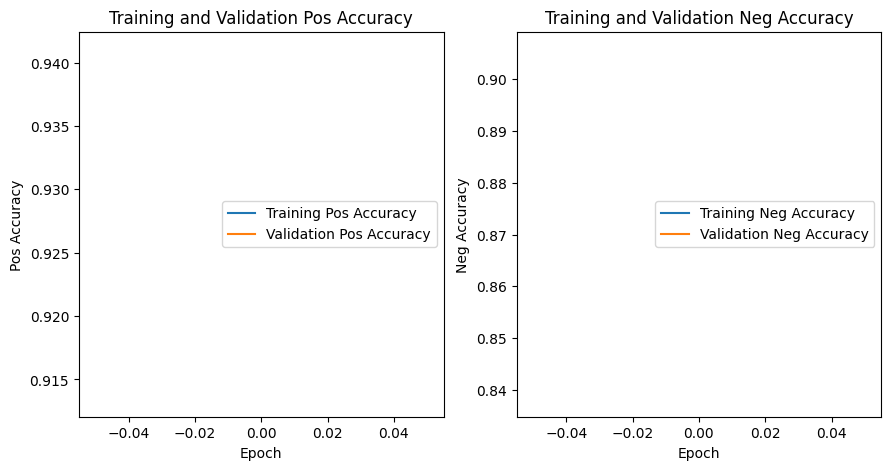

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9941],
        [0.9656],
        [0.9452]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[8.1384e-01],
        [2.7878e-01],
        [3.6080e-04],
        [9.6143e-06],
        [1.0916e-07],
        [2.2162e-09],
        [2.6795e-01],
        [9.0545e-04]], device='cuda:0', grad_fn=<SliceBackward0>)
Epoch [2/600] | Training Loss: 0.7555 | Training Pos Accuracy: 0.9692 | Training Neg Accuracy: 0.8985 | Training Total Accuracy: 0.9022
Validation - Epoch [2/600] | Loss: 0.1604 | Val Pos Accuracy: 0.9787 | Val Neg Accuracy: 0.9134 | Val Total Accuracy: 0.9168

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9898],
        [0.9525],
        [0.9557]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.4224e-01],
        [3.6395e-01],
        [3.9626e-04],
        [8.0903e-07],
        [1.5289e-09],
        [5.2670e-12],
        [7.9471e-01],
        [1.6045e-03]], device='cuda:0', grad

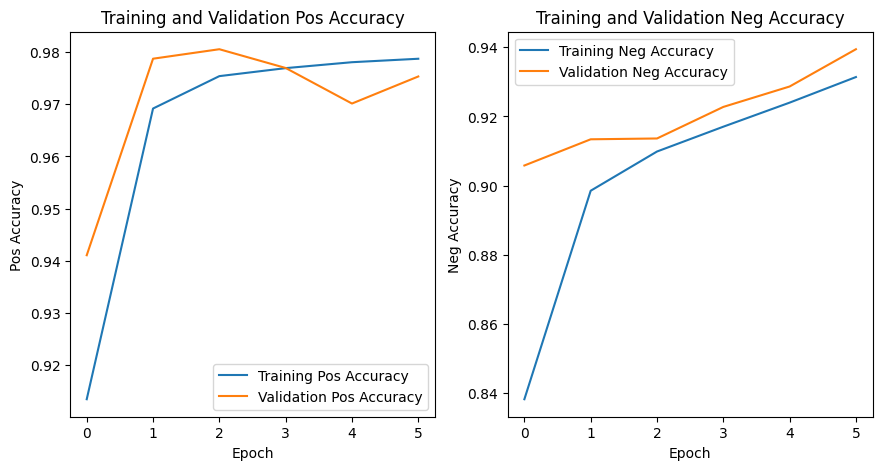

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9911],
        [0.9958],
        [0.9321]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.3698e-01],
        [6.2982e-01],
        [1.9848e-05],
        [8.2025e-10],
        [4.0510e-14],
        [2.4265e-17],
        [9.2693e-01],
        [5.7968e-05]], device='cuda:0', grad_fn=<SliceBackward0>)
Epoch [7/600] | Training Loss: 0.5088 | Training Pos Accuracy: 0.9806 | Training Neg Accuracy: 0.9354 | Training Total Accuracy: 0.9378
Validation - Epoch [7/600] | Loss: 0.1375 | Val Pos Accuracy: 0.9716 | Val Neg Accuracy: 0.9422 | Val Total Accuracy: 0.9437

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9902],
        [0.9962],
        [0.9993]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.5556e-01],
        [6.5663e-01],
        [4.1691e-05],
        [7.3902e-09],
        [8.4252e-12],
        [3.9365e-14],
        [9.8556e-01],
        [2.0110e-04]], device='cuda:0', grad

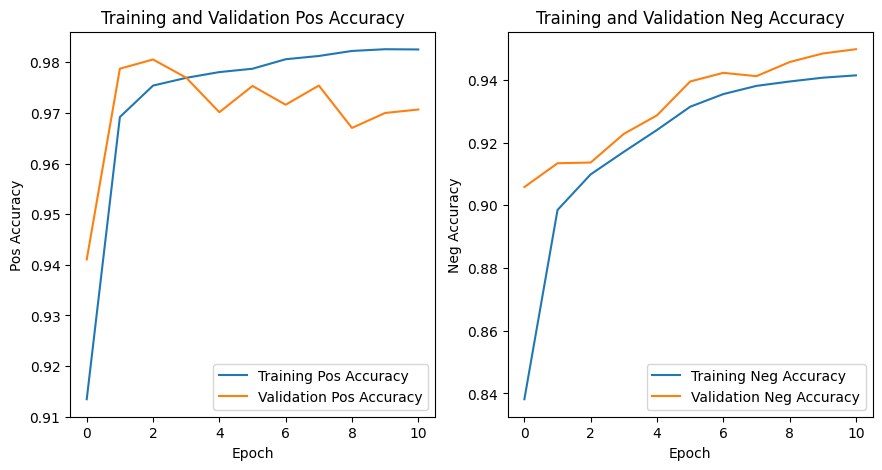

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9951],
        [0.8781],
        [0.9946]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.2090e-01],
        [5.7845e-01],
        [5.5445e-06],
        [5.4359e-10],
        [3.4160e-13],
        [3.2560e-16],
        [9.7125e-01],
        [3.7197e-05]], device='cuda:0', grad_fn=<SliceBackward0>)
Epoch [12/600] | Training Loss: 0.4542 | Training Pos Accuracy: 0.9836 | Training Neg Accuracy: 0.9423 | Training Total Accuracy: 0.9445
Validation - Epoch [12/600] | Loss: 0.1210 | Val Pos Accuracy: 0.9665 | Val Neg Accuracy: 0.9517 | Val Total Accuracy: 0.9525

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9782],
        [0.9940],
        [0.9971]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.4945e-01],
        [9.6579e-01],
        [2.4314e-04],
        [4.1844e-08],
        [1.5722e-11],
        [3.6016e-14],
        [9.7974e-01],
        [8.7913e-04]], device='cuda:0', gr

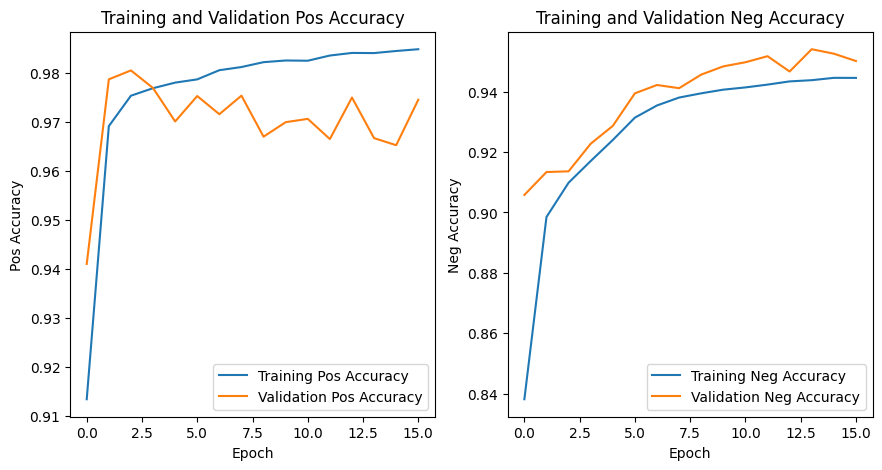

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9890],
        [0.9914],
        [0.9946]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.6055e-01],
        [4.2434e-01],
        [2.6007e-05],
        [4.2297e-09],
        [3.4716e-12],
        [2.2947e-15],
        [8.3827e-01],
        [9.0804e-05]], device='cuda:0', grad_fn=<SliceBackward0>)
Epoch [17/600] | Training Loss: 0.4330 | Training Pos Accuracy: 0.9853 | Training Neg Accuracy: 0.9448 | Training Total Accuracy: 0.9470
Validation - Epoch [17/600] | Loss: 0.1099 | Val Pos Accuracy: 0.9798 | Val Neg Accuracy: 0.9485 | Val Total Accuracy: 0.9501

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9891],
        [0.9952],
        [0.9920]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.4566e-01],
        [2.4661e-01],
        [1.1933e-05],
        [3.9579e-09],
        [2.8395e-12],
        [3.4943e-15],
        [9.8286e-01],
        [4.5576e-05]], device='cuda:0', gr

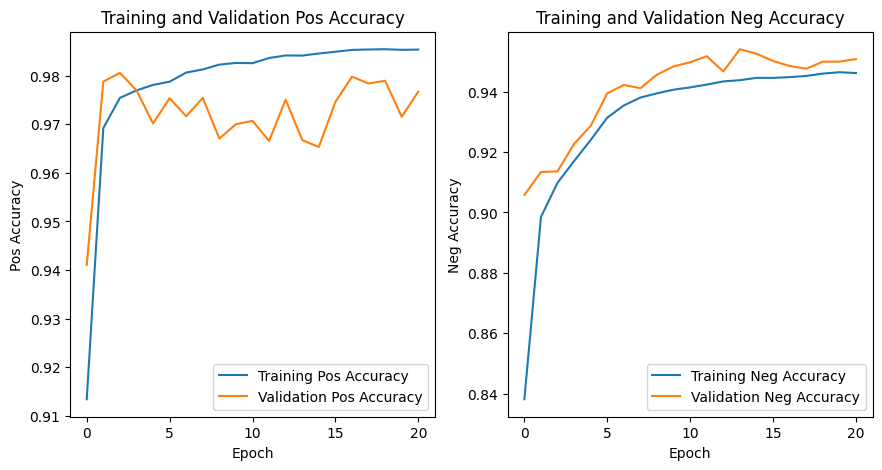

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9944],
        [0.9972],
        [0.9987]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.6298e-01],
        [3.5022e-01],
        [4.0390e-06],
        [4.8652e-11],
        [1.9356e-15],
        [3.4978e-19],
        [9.3364e-01],
        [2.8608e-05]], device='cuda:0', grad_fn=<SliceBackward0>)
Epoch [22/600] | Training Loss: 0.4170 | Training Pos Accuracy: 0.9862 | Training Neg Accuracy: 0.9469 | Training Total Accuracy: 0.9490
Validation - Epoch [22/600] | Loss: 0.1081 | Val Pos Accuracy: 0.9772 | Val Neg Accuracy: 0.9476 | Val Total Accuracy: 0.9492

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9798],
        [0.9334],
        [0.9923]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.4979e-01],
        [8.7768e-01],
        [4.9753e-05],
        [2.1621e-10],
        [5.4889e-15],
        [1.0230e-19],
        [9.5894e-01],
        [1.6087e-04]], device='cuda:0', gr

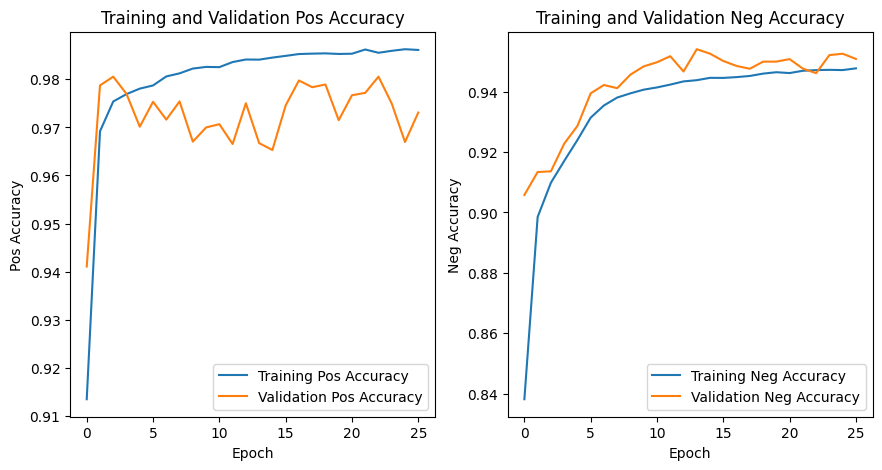

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9904],
        [0.9985],
        [0.9947]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.7033e-01],
        [4.6079e-01],
        [4.8579e-07],
        [2.6390e-15],
        [1.6478e-22],
        [7.7440e-30],
        [9.8817e-01],
        [4.8764e-06]], device='cuda:0', grad_fn=<SliceBackward0>)
Epoch [27/600] | Training Loss: 0.4130 | Training Pos Accuracy: 0.9862 | Training Neg Accuracy: 0.9474 | Training Total Accuracy: 0.9495
Validation - Epoch [27/600] | Loss: 0.1121 | Val Pos Accuracy: 0.9716 | Val Neg Accuracy: 0.9533 | Val Total Accuracy: 0.9543

tensor([[ 0,  2, 29],
        [ 2, 29, 36]], device='cuda:0')
tensor([[0.9872],
        [0.9976],
        [0.9393]], device='cuda:0', grad_fn=<IndexBackward0>)
tensor([[9.7555e-01],
        [4.2779e-01],
        [1.1762e-05],
        [5.7101e-11],
        [6.0858e-16],
        [3.1957e-21],
        [9.5366e-01],
        [1.2988e-04]], device='cuda:0', gr

In [ ]:
# Layer Masked Model
num_epochs = 600

train_pos_accuracy_withEpochs = []
train_neg_accuracy_withEpochs = []
train_accuracy_withEpochs = []

val_pos_accuracy_withEpochs = []
val_neg_accuracy_withEpochs = []
val_accuracy_withEpochs = []

train_loss_withEpochs = []
val_loss_withEpochs = []

gcn_model.cuda()
link_predictor.cuda()

for epoch in range(num_epochs):
  train_losses = []

  train_losses = []
  correct_predictions = 0
  total_predictions = 0
  correct_pos_predictions = 0
  correct_neg_predictions = 0
  total_pos_predictions = 0
  total_neg_predictions = 0

    
  gcn_model.train()
  link_predictor.train()  
    
    
  for data in train_dataloader:
      data = data.to('cuda')
      optimizer.zero_grad()

      node_emb = gcn_model(data.x_2d_with_slopes, data.edge_index_can)
      #node_emb = gcn_model(data.x_2d, data.edge_index_can)
      pos_edge = data.edge_index_can

      src_emb = node_emb[pos_edge[0]]
      dst_emb = node_emb[pos_edge[1]]


      pred = link_predictor(src_emb, dst_emb)
       
    
      #pos_src, pos_dst = data.edge_index[0], data.edge_index[1]
      #neg_src, neg_dst = data.edge_index_neg[0], data.edge_index_neg[1]
        

      pos_pred = pred[data.edge_y]
      neg_pred = pred[data.edge_y_neg]

############################    LAYER MASKING START   ######################################
############################################################################################

      #same_layer_mask_pos = data.layer[pos_edge[0]] == data.layer[pos_edge[1]]
      #same_layer_mask_neg = data.layer[neg_src] == data.layer[neg_dst]

      # Calculate the loss for positive examples while excluding same-layer links


      ## loss_pos_filtered = -torch.log(pos_pred + 1e-15)
      # loss_pos_filtered = -len(data.edge_index_neg[0]) * torch.log(pos_pred + 1e-15)
      loss_pos_filtered = - torch.log(pos_pred + 1e-15)


      ## loss_pos_filtered = loss_pos[~same_layer_mask_pos]  # Filter out same-layer links
      loss_pos_mean = loss_pos_filtered.sum()

      # Calculate the loss for negative examples while excluding same-layer links


      ## loss_neg_filtered = -torch.log(1 - neg_pred + 1e-15)
      # loss_neg_filtered = -len(data.edge_index[0]) * torch.log(1 - neg_pred + 1e-15)
      loss_neg_filtered = -torch.log(1 - neg_pred + 1e-15)


      ## loss_neg_filtered = loss_neg[~same_layer_mask_neg]  # Filter out same-layer links
      loss_neg_mean = loss_neg_filtered.sum()


      # Calculate the overall loss
      #loss = (loss_pos_mean + loss_neg_mean)/(len(data.edge_index[0]) + len(data.edge_index_neg[0]))
      loss = 2 * (loss_pos_mean / len(data.edge_index[0])) + 2 * (loss_neg_mean / len(data.edge_index_neg[0]))


      #loss_pos = nn.BCELoss()(pos_pred, torch.ones_like(pos_pred))

      # Calculate the binary cross-entropy loss for negative examples
      #loss_neg = nn.BCELoss()(neg_pred, torch.zeros_like(neg_pred))

      # Calculate the overall loss
      #loss = (loss_pos + loss_neg) * 2



############################    3 LINK MAX PREDICTION   ######################################
##############################################################################################
      # if epoch > 25:
      #   pos_pred_num = (pos_pred > 0.5).sum().item() + (neg_pred > 0.5).sum().item()
      #   loss = loss * ((neg_pred > 0.5).sum().item()/len((neg_pred)))

############################    3 LINK MAX PREDICTION END  ######################################
#################################################################################################

############################    LAYER MASKING END   ######################################
##########################################################################################




      #loss = -torch.log(pos_pred + 1e-15).mean() - torch.log(1 - neg_pred + 1e-15).mean()
      #loss = -torch.log(pos_pred + 1e-15).mean() #- torch.log(1 - neg_pred + 1e-15).mean()

      ## loss = torch.mean(torch.ones_like(pos_pred) - pos_pred) + torch.mean(neg_pred)

      #loss = nn.BCELoss()(torch.cat((pos_pred, neg_pred)), torch.cat((torch.ones_like(pos_pred), torch.zeros_like(neg_pred))))

      loss.backward()
      optimizer.step()
      ##optimizer_1.step()
      ##optimizer_2.step()

      ## train_losses.append(loss.item())
      train_losses.append(loss)

      pos_count = (pos_pred >= 0.5).sum().item() #/ len(pos_pred)
      neg_count = (neg_pred < 0.5).sum().item() #/ len(neg_pred)

      correct_pos_predictions += pos_count
      correct_neg_predictions += neg_count
      correct_predictions += (pos_count + neg_count)

      total_pos_predictions += len(pos_pred)
      total_neg_predictions += len(neg_pred)
      total_predictions += (len(pos_pred) + len(neg_pred))

  pos_accuracy = correct_pos_predictions/total_pos_predictions
  neg_accuracy = correct_neg_predictions/total_neg_predictions
  accuracy = correct_predictions / total_predictions



######## ######## ######## ########   VALIDATION START   ######## ######## ######## ########
######## ######## ######## ######## ########    ######## ######## ######## ######## ########

  ## VALIDATION
  gcn_model.eval()
  link_predictor.eval()

  val_losses = []
  correct_val_predictions = 0
  total_val_predictions = 0
  correct_pos_val_predictions = 0
  correct_neg_val_predictions = 0
  total_pos_val_predictions = 0
  total_neg_val_predictions = 0

  for data in val_dataloader:
    data = data.to('cuda')
    node_emb = gcn_model(data.x_2d_with_slopes, data.edge_index_can)
    #node_emb = gcn_model(data.x_2d, data.edge_index_can)
    pos_edge = data.edge_index_can

    src_emb = node_emb[pos_edge[0]]
    dst_emb = node_emb[pos_edge[1]]

    edge_slopes = data.edge_slopes 
    
    pred = link_predictor(src_emb, dst_emb)
    #pos_src, pos_dst = data.edge_index[0], data.edge_index[1]
    #neg_src, neg_dst = data.edge_index_neg[0], data.edge_index_neg[1]

    pos_pred = pred[data.edge_y]
    neg_pred = pred[data.edge_y_neg]

    loss = torch.mean(torch.ones_like(pos_pred) - pos_pred) + torch.mean(neg_pred)

    val_losses.append(loss.item())

    pos_count = (pos_pred >= 0.5).sum().item()
    neg_count = (neg_pred < 0.5).sum().item()

    correct_pos_val_predictions += pos_count
    correct_neg_val_predictions += neg_count
    correct_val_predictions += (pos_count + neg_count)

    total_pos_val_predictions += len(pos_pred)
    total_neg_val_predictions += len(neg_pred)
    total_val_predictions += (len(pos_pred) + len(neg_pred))

  pos_val_accuracy = correct_pos_val_predictions/total_pos_val_predictions
  neg_val_accuracy = correct_neg_val_predictions/total_neg_val_predictions
  val_accuracy = correct_val_predictions / total_val_predictions


  avg_val_loss = sum(val_losses) / len(val_losses)
  avg_train_loss = sum(train_losses) / len(train_losses)

######## ######## ########   VALIDATION END  ######## ######## ########
######## ######## ######## ######## ######## ######## ######## ########

  train_pos_accuracy_withEpochs.append(pos_accuracy)
  train_neg_accuracy_withEpochs.append(neg_accuracy)

  val_pos_accuracy_withEpochs.append(pos_val_accuracy)
  val_neg_accuracy_withEpochs.append(neg_val_accuracy)

  train_accuracy_withEpochs.append(accuracy)
  val_accuracy_withEpochs.append(val_accuracy)

  train_loss_withEpochs.append(avg_train_loss)
  val_loss_withEpochs.append(avg_val_loss)

######## ######## ########    PRINT RESULTS   ######## ######## ########
######## ######## ######## ########  ######## ######## ######## ########

  '''
  print(data.edge_index)
  print(pos_pred)
  print(neg_pred[0:8])

  if epoch % 15 == 0:
    print("pos pred: ", pos_pred)
    print("neg pred: ", neg_pred)


  print("loss:", loss)
  print(f'Epoch [{epoch+1}/{num_epochs}] | Loss: {avg_train_loss:.4f} | Pos Accuracy: {pos_accuracy:.4f} | Neg Accuracy: {neg_accuracy:.4f}')
  print()
  '''

  print(data.edge_index)
  print(pos_pred)
  print(neg_pred[0:8])
  print(f'Epoch [{epoch+1}/{num_epochs}] | Training Loss: {avg_train_loss:.4f} | Training Pos Accuracy: {pos_accuracy:.4f} | Training Neg Accuracy: {neg_accuracy:.4f} | Training Total Accuracy: {accuracy:.4f}')

  print(f'Validation - Epoch [{epoch+1}/{num_epochs}] | Loss: {avg_val_loss:.4f} | Val Pos Accuracy: {pos_val_accuracy:.4f} | Val Neg Accuracy: {neg_val_accuracy:.4f} | Val Total Accuracy: {val_accuracy:.4f}')
  print()
    
  torch.save(gcn_model.state_dict(), "/volatile/halla/sbs/bhasitha/gcn_model.pth")
  torch.save(link_predictor.state_dict(), "/volatile/halla/sbs/bhasitha/link_predictor.pth")
    
  if epoch%5 == 0:

    # Plot the training and validation loss
    plt.figure(figsize=(16, 5))
    plt.subplot(1, 3, 1)
    plt.plot(train_pos_accuracy_withEpochs, label="Training Pos Accuracy")
    plt.plot(val_pos_accuracy_withEpochs, label="Validation Pos Accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Pos Accuracy")
    plt.title("Training and Validation Pos Accuracy")


    # Plot the training and validation accuracy
    plt.subplot(1, 3, 2)
    plt.plot(train_neg_accuracy_withEpochs, label="Training Neg Accuracy")
    plt.plot(val_neg_accuracy_withEpochs, label="Validation Neg Accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Neg Accuracy")
    plt.title("Training and Validation Neg Accuracy")
    '''
    # Plot the training and validation accuracy
    plt.subplot(1, 3, 3)
    plt.plot(train_loss_withEpochs.detach().numpy(), label="Training Accuracy")
    plt.plot(val_loss_withEpochs.detach().numpy(), label="Validation Accuracy")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    '''
    plt.show()  

In [ ]:
selected_index = 8

gcn_model.cpu()
link_predictor.cpu()

gcn_model.eval()
link_predictor.eval()

for i, data in enumerate(val_dataloader):
    if i == selected_index:  # 7th index since indexing starts from 0
        x_data = data.x_2d_with_slopes
        edge_data = data.edge_index_can
        y_data = data.y
        layer_data = data.layer

        break

node_emb = gcn_model(x_data, edge_data)
src_emb = node_emb[edge_data[0]]
dst_emb = node_emb[edge_data[1]]

pos_pred = (link_predictor(src_emb, dst_emb)> 0.5)
len(y_data)

In [ ]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap

coordinate_data = x_data
coordinate_data_2 = (x_data)[(y_data) == 1]

values = layer_data

unique_values = values.unique()
num_unique_values = len(unique_values)
color_map = ListedColormap(['magenta', 'g', 'b', 'y'][:num_unique_values])

# Map values to colors
colors = [color_map(value.item()) for value in values]


data_edge_index_can = edge_data
mask = pos_pred[:, 0]

all_edges = data_edge_index_can#[:, mask]

x = coordinate_data[:, 0]
y = coordinate_data[:, 1]

p = coordinate_data_2[:, 0]
q = coordinate_data_2[:, 1]

# Create a figure with a 1x2 grid of subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 9))

# First subplot (left)

ax1.scatter(x, y, c=colors, marker='o', alpha=0.6)
ax1.scatter(p, q, label="Hits on a Track", color='r', marker='x', s=220, linewidth=0.5)
for i in range(all_edges.shape[1]):
    idx1 = all_edges[0, i]
    idx2 = all_edges[1, i]
    ax1.plot([x[idx1], x[idx2]], [y[idx1], y[idx2]], color='g', linewidth=0.4)
ax1.set_xlabel("X-axis")
ax1.set_ylabel("Y-axis")
ax1.set_title("2D Plane Plot - Tensor Data of Nodes  -  All edges")
ax1.grid(True)
ax1.legend()

# Second subplot (right)
ax2.scatter(x, y, c=colors, marker='o', alpha=0.6)
ax2.scatter(p, q, label="Hits on a Track", color='r', marker='x', s=220, linewidth=0.5)

predicted_edges = data_edge_index_can[:, mask]

for i in range(predicted_edges.shape[1]):
    idx1 = predicted_edges[0, i]
    idx2 = predicted_edges[1, i]
    ax2.plot([x[idx1], x[idx2]], [y[idx1], y[idx2]], color='g', linewidth=0.4)
ax2.set_xlabel("X-axis")
ax2.set_ylabel("Y-axis")
ax2.set_title("2D Plane Plot - Tensor Data of Nodes  -  TRACK PREDICTION")
ax2.grid(True)
ax2.legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()